<a href="https://colab.research.google.com/github/namdarine/TIF_Chicago_Project/blob/main/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import library

In [ ]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.wkt import loads
import warnings
warnings.filterwarnings("ignore")
import pickle
import folium
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import gamma

In [ ]:
JJ_path = '/content/drive/MyDrive/IPRO497_Demographic Team/Final/data/'
K_path = '/Users/kunwoosmac/Library/Mobile Documents/com~apple~CloudDocs/Python Workspace/IIT Courses/TIF DS Project/Final/data/'
L_path = '/content/drive/MyDrive/IPRO/IPRO 497 TIF Districts/IPRO497_Demographic Team/Final/data/'
JJ_path_image = '/content/drive/MyDrive/IPRO497_Demographic Team/Final/images/'

path = JJ_path
path_image = JJ_path_image

# Import dataset

In [ ]:
JJ_path = '/content/drive/MyDrive/IPRO497_Demographic Team/Final/data/'
K_path = '/Users/kunwoosmac/Library/Mobile Documents/com~apple~CloudDocs/Python Workspace/IIT Courses/TIF DS Project/Final/data/'
L_path = '/content/drive/MyDrive/IPRO/IPRO 497 TIF Districts/IPRO497_Demographic Team/Final/data/'

path = JJ_path

Community_area = gpd.read_file(path + 'Boundaries - Community Areas (current).geojson')

tifs = pd.read_csv(path + '2019_TIF_Boundaries.csv')
tifs = gpd.GeoDataFrame(tifs)
tifs = tifs.rename(columns={'the_geom': 'geometry'})
tifs['geometry'] = loads(tifs['geometry'])
tifs.set_geometry('geometry', inplace = True)

Blockgroup_boundary = pd.read_csv(path+'cleanBlockGroups.csv')
Blockgroup_boundary = Blockgroup_boundary.drop(columns=['coords'])
prefix = '1500000US'
Blockgroup_boundary['geoid'] = prefix + Blockgroup_boundary['geoid'].astype(str)

racial_population = pd.read_csv(path+'racial_population.csv')

In [ ]:
with open(path+'year_race_community_Median_TIF.pickle', 'rb') as f:
	year_race_community_Median_TIF = pickle.load(f)
with open(path+'year_race_community_Median_Non_TIF.pickle', 'rb') as f:
	year_race_community_Median_Non_TIF = pickle.load(f)

with open(path+'year_race_community_Owner_TIF.pickle', 'rb') as f:
	year_race_community_Owner_TIF = pickle.load(f)
with open(path+'year_race_community_Owner_Non_TIF.pickle', 'rb') as f:
	year_race_community_Owner_Non_TIF = pickle.load(f)

with open(path+'year_race_community_Renter_TIF.pickle', 'rb') as f:
	year_race_community_Renter_TIF = pickle.load(f)
with open(path+'year_race_community_Renter_Non_TIF.pickle', 'rb') as f:
	year_race_community_Renter_Non_TIF = pickle.load(f)

with open(path+'year_race_community_Employment_TIF.pickle', 'rb') as f:
	year_race_community_Employment_TIF = pickle.load(f)
with open(path+'year_race_community_Employment_Non_TIF.pickle', 'rb') as f:
	year_race_community_Employment_Non_TIF = pickle.load(f)
year_race_community_Employment_TIF.head(3)

with open(path+'year_race_community_Unemployment_TIF.pickle', 'rb') as f:
	year_race_community_Unemployment_TIF = pickle.load(f)
with open(path+'year_race_community_Unemployment_Non_TIF.pickle', 'rb') as f:
	year_race_community_Unemployment_Non_TIF = pickle.load(f)

with open(path+'year_race_community_EducationA_TIF.pickle', 'rb') as f:
	year_race_community_EducationA_TIF = pickle.load(f)
with open(path+'year_race_community_EducationA_Non_TIF.pickle', 'rb') as f:
	year_race_community_EducationA_Non_TIF = pickle.load(f)

with open(path+'year_race_community_EducationB_TIF.pickle', 'rb') as f:
	year_race_community_EducationB_TIF = pickle.load(f)
with open(path+'year_race_community_EducationB_Non_TIF.pickle', 'rb') as f:
	year_race_community_EducationB_Non_TIF = pickle.load(f)

with open(path+'year_race_community_EducationC_TIF.pickle', 'rb') as f:
	year_race_community_EducationC_TIF = pickle.load(f)
with open(path+'year_race_community_EducationC_Non_TIF.pickle', 'rb') as f:
	year_race_community_EducationC_Non_TIF = pickle.load(f)

with open(path+'year_race_community_EducationD_TIF.pickle', 'rb') as f:
	year_race_community_EducationD_TIF = pickle.load(f)
with open(path+'year_race_community_EducationD_Non_TIF.pickle', 'rb') as f:
	year_race_community_EducationD_Non_TIF = pickle.load(f)

with open(path+'year_race_community_EducationE_TIF.pickle', 'rb') as f:
	year_race_community_EducationE_TIF = pickle.load(f)
with open(path+'year_race_community_EducationE_Non_TIF.pickle', 'rb') as f:
	year_race_community_EducationE_Non_TIF = pickle.load(f)

with open(path+'year_race_community_EducationF_TIF.pickle', 'rb') as f:
	year_race_community_EducationF_TIF = pickle.load(f)
with open(path+'year_race_community_EducationF_Non_TIF.pickle', 'rb') as f:
	year_race_community_EducationF_Non_TIF = pickle.load(f)

with open(path+'year_race_community_EducationG_TIF.pickle', 'rb') as f:
	year_race_community_EducationG_TIF = pickle.load(f)
with open(path+'year_race_community_EducationG_Non_TIF.pickle', 'rb') as f:
	year_race_community_EducationG_Non_TIF = pickle.load(f)

with open(path+'year_race_community_AverageHousingPrice_TIF.pickle', 'rb') as f:
	year_race_community_AverageHousingPrice_TIF = pickle.load(f)
with open(path+'year_race_community_AverageHousingPrice_Non_TIF.pickle', 'rb') as f:
	year_race_community_AverageHousingPrice_Non_TIF = pickle.load(f)


In [ ]:
# load pickle file
with open(path+'DemographicsDataframe2017.pickle', 'rb') as f:
	DemographicsDataframe2017 = pickle.load(f)

with open(path+'DemographicsDataframe2018.pickle', 'rb') as f:
	DemographicsDataframe2018 = pickle.load(f)

with open(path+'DemographicsDataframe2019.pickle', 'rb') as f:
	DemographicsDataframe2019 = pickle.load(f)

with open(path+'DemographicsDataframe2020.pickle', 'rb') as f:
	DemographicsDataframe2020 = pickle.load(f)

with open(path+'DemographicsDataframe2021.pickle', 'rb') as f:
	DemographicsDataframe2021 = pickle.load(f)

with open(path+'DemographicsDataframe2022.pickle', 'rb') as f:
	DemographicsDataframe2022 = pickle.load(f)

with open(path+'racial_population.pickle', 'rb') as f:
	racial_population = pickle.load(f)

# Function

In [ ]:
def aggregate_community_level_Non_TIF_for_population(DemographicsDataframe_info,metric,column_name_info):
  """
  INPUT :
  DemographicsDataframe_info - Ratio/Relationship between CBG, TIF, and community
  metric                     - e.g) income, housing price, owner, ...
  Blockgroup_boundary_info   - Blockgroup boundary
  column_name_info           - the column name of metric e.g) ['Community', 'Less than $10,000', '$10,000 - $14,999', ... ]

  OUTPUT : metric data in Non TIF at the community level.
  -----------------------------------------------------------------------------------------------------------------------------------------
  test code
  test_incomeDistribution = pd.DataFrame({'geoid':['1500000US170313501001','1500000US170313501002','1500000US170313504001'],
                      'Less than $10,000':[[10,2,40],[2,4,8],[20,30,70]],
                      '$10,000 to $14,999':[[30,40,50],[4,6,10],[50,60,100]]})


  test_demogrpahicsDataFrame = pd.DataFrame({'Community':'DOUGLAS',
                                            'CBG in Community':[['1500000US170313501001','1500000US170313501002','1500000US170313504001']],
                                            'Non-TIF Ratio of CBG':[[0.1,0.5,0.1]]})
  column_name = ['Community','Less than $10,000','$10,000 to $14,999']
  aggregate_community_level_Non_TIF(test_demogrpahicsDataFrame,test_incomeDistribution,Blockgroup_boundary,column_name)

  result

  Community	Less than $10,000	$10,000 to $14,999
  DOUGLAS	[4.0, 5.2, 15.0]	[10.0, 13.0, 20.0]
  -----------------------------------------------------------------------------------------------------------------------------------------
  """
# column_name = ['geoid','White Population','Black Population','Hispanic Population']
# aggregate_community_level_Non_TIF(DemographicsDataframe2017,racial_population,racial_population,column_name)


  GEOID = metric.columns[0]  # name of geoid e.g) 'geoid', 'GEO_ID', 'geo_id', 'GEOID'
  community_names = DemographicsDataframe_info['Community']
  no_data_of_geoid = []
  column_number = len(column_name_info)-1 # reason for -1 : 'Community'
  aggregated_Non_TIF = []
  for com_number, com_name in enumerate(community_names):
    lst = np.zeros((column_number))
    # print(lst)
    for range_name_index, range_name in enumerate(column_name_info[1:]):
      for GEOID_in_Community_index,GEOID_in_Community in enumerate(DemographicsDataframe_info['CBG in Community'].iloc[com_number]):
        if len(metric[metric[GEOID]==GEOID_in_Community][range_name])==0:
          no_data_of_geoid.append(GEOID_in_Community)
        else:
          ratio = DemographicsDataframe_info['Non-TIF Ratio of CBG'].iloc[com_number][GEOID_in_Community_index]
          # print('ratio: ',ratio)
          # print(f'{range_name},{com_name},{range_name_index}:',metric[metric[GEOID]==GEOID_in_Community][range_name].iloc[0]*ratio)
          lst[range_name_index] += metric[metric[GEOID]==GEOID_in_Community][range_name].iloc[0]*ratio # iloc[0] : for calculating element
          # print(f'lst:',lst)
    aggregated_Non_TIF.append(np.array([[com_name]+list(lst)],dtype=object)[0])


  aggregated_Non_TIF_df = pd.DataFrame(aggregated_Non_TIF, columns = column_name_info)
  return aggregated_Non_TIF_df

In [ ]:
def aggregate_community_level_TIF_for_population(DemographicsDataframe_info,metric,column_name_info):
  """
  INPUT :
  DemographicsDataframe_info - Ratio/Relationship between CBG, TIF, and community
  metric                     - e.g) income, housing price, owner, ...
  column_name_info           - the column name of metric e.g) ['Community', 'Less than $10,000', '$10,000 - $14,999', ... ]

  OUTPUT : metric data in TIF at the community level.
  -----------------------------------------------------------------------------------------------------------------------------------------
  test code
  test_incomeDistribution = pd.DataFrame({'geoid':['a','b','c','d','e'],
                      'Less than $10,000':[[10,2,40],[2,4,8],[20,30,70],[40,10,20],[90,80,70]],
                      '$10,000 to $14,999':[[30,40,50],[4,6,10],[50,60,100],[86,40,32],[10,20,30]]})

  test_demogrpahicsDataFrame = pd.DataFrame(columns=['Community','CBG in Community','TIF in Community','CBG in TIF','CBG-Community-TIF Overlap','Non-TIF Ratio of CBG'])
  test_demogrpahicsDataFrame['Community'] = [0,0]
  test_demogrpahicsDataFrame=test_demogrpahicsDataFrame.drop(1)
  test_demogrpahicsDataFrame['Community'].iloc[0] = 'DOUGLAS'
  test_demogrpahicsDataFrame['CBG in Community'].iloc[0] = ['a', 'b', 'c', 'd','e']
  test_demogrpahicsDataFrame['TIF in Community'].iloc[0] = ['x', 'y', 'z']
  test_demogrpahicsDataFrame['CBG in TIF'].iloc[0] = [['a', 'b'], ['a', 'c', 'e'], ['e', 'd']]
  test_demogrpahicsDataFrame['CBG-Community-TIF Overlap'].iloc[0] = [[0.1, 0.2], [0.1, 0.5, 0.2], [0.1, 0.2]]
  test_demogrpahicsDataFrame['Non-TIF Ratio of CBG'].iloc[0] = [0.1, 0.5, 0.1, 0.2,0.3]
  column_name = ['Community','Less than $10,000','$10,000 to $14,999']
  aggregate_community_level_TIF(test_demogrpahicsDataFrame,test_incomeDistribution,Blockgroup_boundary,column_name)


  result
  Community	Less than $10,000	$10,000 to $14,999
	DOUGLAS	[47.4, 42.2, 69.6]	[52.0, 53.2, 77.4]

  -----------------------------------------------------------------------------------------------------------------------------------------
  """

  GEOID = metric.columns[0]  # name of geoid e.g) 'geoid', 'GEO_ID', 'geo_id', 'GEOID'
  community_names = DemographicsDataframe_info['Community']
  no_data_of_geoid = []
  column_number = len(column_name_info)-1 # reason for -1 : 'Community'
  aggregated_TIF = []
  for com_number, com_name in enumerate(community_names):
    lst = np.zeros((column_number))
    # print(lst)
    for range_name_index, range_name in enumerate(column_name_info[1:]):
      CBG_in_TIF_Community = [item for sublist in DemographicsDataframe_info['CBG in TIF'].iloc[com_number] for item in sublist]
      CBG_in_TIF_Community_index = [index for index, sublist in enumerate(DemographicsDataframe_info['CBG in TIF'].iloc[com_number]) for _ in range(len(sublist))]
      for CBG_index,(index, GEOID_TIF) in enumerate(zip(CBG_in_TIF_Community_index,CBG_in_TIF_Community)):
        if len(metric[metric[GEOID]==GEOID_TIF][range_name])==0:
          no_data_of_geoid.append(GEOID_TIF)
        else:
          Overlap_list = [item for sublist in DemographicsDataframe_info['CBG-Community-TIF Overlap'].iloc[com_number] for item in sublist]
          ratio = Overlap_list[CBG_index]
          # print(f'{com_name},{range_name} :',metric[metric[GEOID]==GEOID_TIF][range_name].iloc[0]*ratio)
          lst[range_name_index] += metric[metric[GEOID]==GEOID_TIF][range_name].iloc[0]*ratio
          # print('lst: ',lst)
    aggregated_TIF.append(np.array([[com_name]+list(lst)],dtype=object)[0])
  aggregated_TIF_df = pd.DataFrame(aggregated_TIF, columns = column_name_info)
  return aggregated_TIF_df

In [ ]:
def aggregate_MI_df_list(df_list):

    list_median_income = []
    one_df = df_list[0]
    White_name = one_df.columns[1]
    Black_name = one_df.columns[2]
    Latin_name = one_df.columns[3]

    # print(one_df.columns)
    community_names = np.array(df_list[0]['Community'])
    columns = df_list[0].columns

    for name in community_names:
        W = [];B = [];L = []
        for df in df_list:
            W.append(df[df['Community'] == name][White_name].iloc[0])
            B.append(df[df['Community'] == name][Black_name].iloc[0])
            L.append(df[df['Community'] == name][Latin_name].iloc[0])

        list_median_income.append(np.array([name, W, B, L], dtype = object))


    return pd.DataFrame(list_median_income, columns = columns)

In [ ]:
column_name = ['Community','White Population','Black Population','Hispanic Population']

seperate_race_community_area_population_TIF_2017 = aggregate_community_level_TIF_for_population(DemographicsDataframe2017,racial_population,column_name)
seperate_race_community_area_population_Non_TIF_2017 = aggregate_community_level_Non_TIF_for_population(DemographicsDataframe2017,racial_population,column_name)

In [ ]:
seperate_race_community_area_population_Non_TIF_2017

,Community,White Population,Black Population,Hispanic Population
0,DOUGLAS,883.217703,5714.562522,209.099396
1,OAKLAND,35.422369,1590.718991,31.495403
2,FULLER PARK,38.334498,2061.887567,104.485267
3,GRAND BOULEVARD,431.511018,17935.467538,336.421318
4,KENWOOD,130.281882,1308.474380,26.676502
...,...,...,...,...
72,MOUNT GREENWOOD,859.516171,50.713819,73.972598
73,MORGAN PARK,2093.448893,11459.448612,310.691819
74,OHARE,2093.448893,11459.448612,310.691819
75,EDGEWATER,6791.297291,2288.441316,2587.049536


In [ ]:
column_name = ['Community','White Population','Black Population','Hispanic Population']

seperate_race_community_area_population_TIF_2017 = aggregate_community_level_TIF_for_population(DemographicsDataframe2017,racial_population,column_name)
seperate_race_community_area_population_Non_TIF_2017 = aggregate_community_level_Non_TIF_for_population(DemographicsDataframe2017,racial_population,column_name)

seperate_race_community_area_population_TIF_2018 = aggregate_community_level_TIF_for_population(DemographicsDataframe2018,racial_population,column_name)
seperate_race_community_area_population_Non_TIF_2018 = aggregate_community_level_Non_TIF_for_population(DemographicsDataframe2018,racial_population,column_name)

seperate_race_community_area_population_TIF_2019 = aggregate_community_level_TIF_for_population(DemographicsDataframe2019,racial_population,column_name)
seperate_race_community_area_population_Non_TIF_2019 = aggregate_community_level_Non_TIF_for_population(DemographicsDataframe2019,racial_population,column_name)

seperate_race_community_area_population_TIF_2020 = aggregate_community_level_TIF_for_population(DemographicsDataframe2020,racial_population,column_name)
seperate_race_community_area_population_Non_TIF_2020 = aggregate_community_level_Non_TIF_for_population(DemographicsDataframe2020,racial_population,column_name)

seperate_race_community_area_population_TIF_2021 = aggregate_community_level_TIF_for_population(DemographicsDataframe2021,racial_population,column_name)
seperate_race_community_area_population_Non_TIF_2021 = aggregate_community_level_Non_TIF_for_population(DemographicsDataframe2021,racial_population,column_name)

seperate_race_community_area_population_TIF_2022 = aggregate_community_level_TIF_for_population(DemographicsDataframe2022,racial_population,column_name)
seperate_race_community_area_population_Non_TIF_2022 = aggregate_community_level_Non_TIF_for_population(DemographicsDataframe2022,racial_population,column_name)

Population_TIF_list = [seperate_race_community_area_population_TIF_2017,seperate_race_community_area_population_TIF_2018,seperate_race_community_area_population_TIF_2019,seperate_race_community_area_population_TIF_2020,seperate_race_community_area_population_TIF_2021,seperate_race_community_area_population_TIF_2022]
Population_Non_TIF_list = [seperate_race_community_area_population_Non_TIF_2017,seperate_race_community_area_population_Non_TIF_2018,seperate_race_community_area_population_Non_TIF_2019,seperate_race_community_area_population_Non_TIF_2020,seperate_race_community_area_population_Non_TIF_2021,seperate_race_community_area_population_Non_TIF_2022]

year_race_community_population_TIF  =  aggregate_MI_df_list(Population_TIF_list)
year_race_community_population_Non_TIF  =  aggregate_MI_df_list(Population_Non_TIF_list)

with open(path + 'year_race_community_population_TIF.pickle', 'wb') as file:
    pickle.dump(year_race_community_population_TIF, file)
with open(path + 'year_race_community_population_Non_TIF.pickle', 'wb') as file:
    pickle.dump(year_race_community_population_Non_TIF, file)


In [ ]:
with open(path+'year_race_community_population_TIF.pickle', 'rb') as f:
	year_race_community_population_TIF = pickle.load(f)
with open(path+'year_race_community_population_Non_TIF.pickle', 'rb') as f:
	year_race_community_population_Non_TIF = pickle.load(f)
year_race_community_population_TIF.head(3)

,Community,White Population,Black Population,Hispanic Population
0,DOUGLAS,"[883.2177030263107, 883.2177030263107, 883.217...","[5714.562521510312, 5714.562521510312, 5714.56...","[209.09939554159132, 209.09939554159132, 209.0..."
1,OAKLAND,"[35.42236920027832, 35.42236920027831, 35.4223...","[1590.7189914362364, 1590.7189914362364, 1590....","[31.49540277587457, 31.49540277587457, 31.4954..."
2,FULLER PARK,"[38.33449839352282, 38.334498393522814, 38.334...","[2061.887567289911, 2061.887567289911, 2061.88...","[104.48526749075775, 104.48526749075776, 104.4..."


In [ ]:
year_race_community_population_Non_TIF.head(3)

,Community,White Population,Black Population,Hispanic Population
0,DOUGLAS,"[1066.3169148766137, 1066.3169148766137, 1066....","[7447.096142150383, 7447.096142150383, 7447.09...","[248.923996438452, 248.923996438452, 248.92399..."
1,OAKLAND,"[117.6633454009905, 117.6633454009905, 117.663...","[3717.700309610461, 3717.7003096104618, 3717.7...","[51.3855573115803, 51.385557311580314, 51.3855..."
2,FULLER PARK,"[14.477193433160375, 14.477193433160375, 14.47...","[608.2486881226725, 608.2486881226725, 608.248...","[27.111599649068218, 27.111599649068225, 27.11..."


In [ ]:
year_race_community_population_Non_TIF

,Community,White Population,Black Population,Hispanic Population
0,DOUGLAS,"[1066.3169148766137, 1066.3169148766137, 1066....","[7447.096142150383, 7447.096142150383, 7447.09...","[248.923996438452, 248.923996438452, 248.92399..."
1,OAKLAND,"[117.6633454009905, 117.6633454009905, 117.663...","[3717.700309610461, 3717.7003096104618, 3717.7...","[51.3855573115803, 51.385557311580314, 51.3855..."
2,FULLER PARK,"[14.477193433160375, 14.477193433160375, 14.47...","[608.2486881226725, 608.2486881226725, 608.248...","[27.111599649068218, 27.111599649068225, 27.11..."
3,GRAND BOULEVARD,"[99.48174033198991, 99.48174033198991, 99.4817...","[2906.3042777167766, 2906.304277716777, 2906.3...","[58.57221209235427, 58.57221209235427, 58.5722..."
4,KENWOOD,"[3074.4412074235347, 3074.4412074235347, 3074....","[11632.800999534104, 11632.800999534104, 11632...","[515.293553191483, 515.293553191483, 515.29355..."
...,...,...,...,...
72,MOUNT GREENWOOD,"[15672.05158804668, 15672.05158804668, 15672.0...","[942.2428266816345, 942.2428266816345, 942.242...","[1307.9048297024333, 1307.9048297024333, 1307...."
73,MORGAN PARK,"[4807.723319529849, 4807.723319529849, 4807.72...","[3692.471063012119, 3692.471063012119, 3692.47...","[348.7812695366565, 348.7812695366565, 348.781..."
74,OHARE,"[15806.0, 15806.0, 15806.0, 15806.0, 15806.0, ...","[574.0, 574.0, 574.0, 574.0, 574.0, 574.0]","[4270.0, 4270.0, 4270.0, 4270.0, 4270.0, 4270.0]"
75,EDGEWATER,"[25089.813696231813, 5181.528159255175, 5181.5...","[5994.322140992251, 982.2768357999446, 982.276...","[6730.745133801631, 2369.7860041554814, 2369.7..."


# Normalization

In [ ]:
def normalization(year_race_community_metric_TIF,year_race_community_population_TIF_info):

  columns=year_race_community_metric_TIF.columns
  metric_name = year_race_community_metric_TIF.columns[1].replace(' of White','')
  metric_name = metric_name.replace('/',' ')
  lst = []
  for com_num, com_name in enumerate(year_race_community_population_TIF_info['Community']):
    White_metric = np.array(year_race_community_metric_TIF[columns[1]].iloc[com_num])/np.array(year_race_community_population_TIF_info['White Population'].iloc[com_num])
    Black_metric = np.array(year_race_community_metric_TIF[columns[2]].iloc[com_num])/np.array(year_race_community_population_TIF_info['Black Population'].iloc[com_num])
    Latin_metric = np.array(year_race_community_metric_TIF[columns[3]].iloc[com_num])/np.array(year_race_community_population_TIF_info['Hispanic Population'].iloc[com_num])
    lst.append(np.array([com_name,White_metric,Black_metric,Latin_metric],dtype=object))

  normalized_df = pd.DataFrame(lst, columns = columns)
  return normalized_df

In [ ]:
year_race_community_Renter_TIF

,Community,Renter of White,Renter of Black,Renter of Latin
0,DOUGLAS,"[192.92747840036458, 207.33559817369994, 215.5...","[2572.329928435504, 2650.589135666592, 2740.77...","[62.79535110416983, 64.157954851256, 66.428544..."
1,OAKLAND,"[10.938704029413447, 11.12365429205948, 11.706...","[615.3257824701662, 630.0643895910503, 654.987...","[10.758041422987214, 11.037081021465648, 11.53..."
2,FULLER PARK,"[8.96002102539876, 9.293122480717226, 9.516892...","[516.2656208087338, 579.9585834733682, 651.045...","[21.119475746674773, 26.830223486853434, 31.89..."
3,GRAND BOULEVARD,"[141.44732259913008, 144.3812227197913, 142.44...","[6416.457362209174, 6566.844528113121, 6485.38...","[118.34526555973225, 123.00110601086139, 124.7..."
4,KENWOOD,"[50.93009848717573, 49.619080408055446, 48.714...","[620.7948980685845, 614.6347070294347, 614.112...","[10.736590590878528, 10.671546118691474, 10.33..."
...,...,...,...,...
72,MOUNT GREENWOOD,"[63.04167255101761, 63.99997784092629, 63.6587...","[6.665975999203349, 7.2054263314571205, 8.0823...","[4.991233824308554, 5.263413825780524, 5.26359..."
73,MORGAN PARK,"[294.40362098766633, 300.26851397830427, 283.1...","[1271.6365073063803, 1241.6086535713075, 1179....","[39.729554352954004, 40.641582964814184, 38.12..."
74,OHARE,"[294.40362098766633, 300.26851397830427, 283.1...","[1271.6365073063803, 1241.6086535713075, 1179....","[39.729554352954004, 40.641582964814184, 38.12..."
75,EDGEWATER,"[3046.6162523343637, 9578.714522405022, 9597.0...","[1195.176260186907, 3282.8130047926525, 3255.6...","[1102.5225462359451, 2645.684396279843, 2612.5..."


In [ ]:
normalized_Owner_TIF = normalization(year_race_community_Owner_TIF,year_race_community_population_TIF)
normalized_Owner_Non_TIF = normalization(year_race_community_Owner_Non_TIF,year_race_community_population_Non_TIF)

with open(path + 'normalized_Owner_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_Owner_TIF, file)
with open(path + 'normalized_Owner_Non_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_Owner_Non_TIF, file)

normalized_Renter_TIF = normalization(year_race_community_Renter_TIF,year_race_community_population_TIF)
normalized_Renter_Non_TIF = normalization(year_race_community_Renter_Non_TIF,year_race_community_population_Non_TIF)

with open(path + 'normalized_Renter_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_Renter_TIF, file)
with open(path + 'normalized_Renter_Non_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_Renter_Non_TIF, file)

normalized_Employment_TIF = normalization(year_race_community_Employment_TIF,year_race_community_population_TIF)
normalized_Employment_Non_TIF = normalization(year_race_community_Employment_Non_TIF,year_race_community_population_Non_TIF)

with open(path + 'normalized_Employment_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_Employment_TIF, file)
with open(path + 'normalized_Employment_Non_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_Employment_Non_TIF, file)

normalized_Unemployment_TIF = normalization(year_race_community_Unemployment_TIF,year_race_community_population_TIF)
normalized_Unemployment_Non_TIF = normalization(year_race_community_Unemployment_Non_TIF,year_race_community_population_Non_TIF)

with open(path + 'normalized_Unemployment_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_Unemployment_TIF, file)
with open(path + 'normalized_Unemployment_Non_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_Unemployment_Non_TIF, file)

normalized_EducationA_TIF = normalization(year_race_community_EducationA_TIF,year_race_community_population_TIF)
normalized_EducationA_Non_TIF = normalization(year_race_community_EducationA_Non_TIF,year_race_community_population_Non_TIF)

with open(path + 'normalized_EducationA_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_EducationA_TIF, file)
with open(path + 'normalized_EducationA_Non_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_EducationA_Non_TIF, file)

normalized_EducationB_TIF = normalization(year_race_community_EducationB_TIF,year_race_community_population_TIF)
normalized_EducationB_Non_TIF = normalization(year_race_community_EducationB_Non_TIF,year_race_community_population_Non_TIF)

with open(path + 'normalized_EducationB_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_EducationB_TIF, file)
with open(path + 'normalized_EducationB_Non_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_EducationB_Non_TIF, file)

normalized_EducationC_TIF = normalization(year_race_community_EducationC_TIF,year_race_community_population_TIF)
normalized_EducationC_Non_TIF = normalization(year_race_community_EducationC_Non_TIF,year_race_community_population_Non_TIF)

with open(path + 'normalized_EducationC_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_EducationC_TIF, file)
with open(path + 'normalized_EducationC_Non_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_EducationC_Non_TIF, file)

normalized_EducationD_TIF = normalization(year_race_community_EducationD_TIF,year_race_community_population_TIF)
normalized_EducationD_Non_TIF = normalization(year_race_community_EducationD_Non_TIF,year_race_community_population_Non_TIF)

with open(path + 'normalized_EducationD_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_EducationD_TIF, file)
with open(path + 'normalized_EducationD_Non_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_EducationD_Non_TIF, file)

normalized_EducationE_TIF = normalization(year_race_community_EducationE_TIF,year_race_community_population_TIF)
normalized_EducationE_Non_TIF = normalization(year_race_community_EducationE_Non_TIF,year_race_community_population_Non_TIF)

with open(path + 'normalized_EducationE_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_EducationE_TIF, file)
with open(path + 'normalized_EducationE_Non_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_EducationE_Non_TIF, file)

normalized_EducationF_TIF = normalization(year_race_community_EducationF_TIF,year_race_community_population_TIF)
normalized_EducationF_Non_TIF = normalization(year_race_community_EducationF_Non_TIF,year_race_community_population_Non_TIF)

with open(path + 'normalized_EducationF_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_EducationF_TIF, file)
with open(path + 'normalized_EducationF_Non_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_EducationF_Non_TIF, file)

normalized_EducationG_TIF = normalization(year_race_community_EducationG_TIF,year_race_community_population_TIF)
normalized_EducationG_Non_TIF = normalization(year_race_community_EducationG_Non_TIF,year_race_community_population_Non_TIF)

with open(path + 'normalized_EducationG_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_EducationG_TIF, file)
with open(path + 'normalized_EducationG_Non_TIF.pickle', 'wb') as file:
    pickle.dump(normalized_EducationG_Non_TIF, file)


In [ ]:
normalized_EducationG_TIF

,Community,Graduate Degree of White,Graduate Degree of Black,Graduate Degree of Latin
0,DOUGLAS,"[0.12771515029338654, 0.13244998661558854, 0.1...","[0.1392074078054745, 0.1453413535177878, 0.153...","[0.13491002135615499, 0.12803935201546393, 0.1..."
1,OAKLAND,"[0.09078818028688823, 0.09373757178348502, 0.0...","[0.05439204699515605, 0.060195177074309845, 0....","[0.06791491204454785, 0.06901510057928964, 0.0..."
2,FULLER PARK,"[0.03656225915993063, 0.023900695375898912, 0....","[0.029358631497618443, 0.016452701416826292, 0...","[0.02779169112554794, 0.013374520984856924, 0...."
3,GRAND BOULEVARD,"[0.107802792120796, 0.11913616528923682, 0.127...","[0.08993071250158696, 0.09616413180215186, 0.1...","[0.08821982498096051, 0.0953753670427972, 0.10..."
4,KENWOOD,"[0.26575346498464547, 0.27799119412953965, 0.2...","[0.15139555198508386, 0.16120382791044258, 0.1...","[0.2279211315792812, 0.24327386795863776, 0.24..."
...,...,...,...,...
72,MOUNT GREENWOOD,"[0.08621913044846047, 0.10912445590800882, 0.1...","[0.09009708447165048, 0.1169450860623538, 0.11...","[0.0739417786120828, 0.09508594702926437, 0.11..."
73,MORGAN PARK,"[0.15087013581457231, 0.14730418456207195, 0.1...","[0.07372900149111336, 0.06910569910431719, 0.0...","[0.11119719751615315, 0.1065211652557841, 0.10..."
74,OHARE,"[0.15087013581457231, 0.14730418456207195, 0.1...","[0.07372900149111336, 0.06910569910431719, 0.0...","[0.11119719751615315, 0.1065211652557841, 0.10..."
75,EDGEWATER,"[0.1929224623149926, 0.2382233114100025, 0.248...","[0.1799460576957872, 0.1966905810942521, 0.194...","[0.17788236826728807, 0.21640660430427364, 0.2..."


In [ ]:
def plot_Chicago(year_race_community_TIF,year_race_community_Non_TIF):
  column_name = year_race_community_TIF.columns[1:]

  year = np.arange(2017,2023,1)
  metric_name = column_name[0].replace(' of White','')
  metric_name = metric_name.replace('/',' ')

  white_array = np.array(list(year_race_community_TIF[column_name[0]].to_dict().values()))
  white_df = pd.DataFrame(white_array)
  white_df = white_df.drop(white_df[white_df[0] == 0].index)
  White_TIF= np.mean(white_df,axis=0)

  Black_array = np.array(list(year_race_community_TIF[column_name[1]].to_dict().values()))
  Black_df = pd.DataFrame(Black_array)
  Black_df = Black_df.drop(Black_df[Black_df[0] == 0].index)
  Black_TIF= np.mean(Black_df,axis=0)

  Latin_array = np.array(list(year_race_community_TIF[column_name[2]].to_dict().values()))
  Latin_df = pd.DataFrame(Latin_array)
  Latin_df = Latin_df.drop(Latin_df[Latin_df[0] == 0].index)
  Latin_TIF= np.mean(Latin_df,axis=0)

  white_array = np.array(list(year_race_community_Non_TIF[column_name[0]].to_dict().values()))
  white_df = pd.DataFrame(white_array)
  white_df = white_df.drop(white_df[white_df[0] == 0].index)
  White_Non_TIF= np.mean(white_df,axis=0)

  Black_array = np.array(list(year_race_community_Non_TIF[column_name[1]].to_dict().values()))
  Black_df = pd.DataFrame(Black_array)
  Black_df = Black_df.drop(Black_df[Black_df[0] == 0].index)
  Black_Non_TIF= np.mean(Black_df,axis=0)

  Latin_array = np.array(list(year_race_community_Non_TIF[column_name[2]].to_dict().values()))
  Latin_df = pd.DataFrame(Latin_array)
  Latin_df = Latin_df.drop(Latin_df[Latin_df[0] == 0].index)
  Latin_Non_TIF= np.mean(Latin_df,axis=0)



  # White_TIF = np.mean(year_race_community_TIF[column_name[0]].apply(lambda x:np.array([x])))[0]
  # Black_TIF = np.mean(year_race_community_TIF[column_name[1]].apply(lambda x:np.array([x])))[0]
  # Latin_TIF = np.mean(year_race_community_TIF[column_name[2]].apply(lambda x:np.array([x])))[0]
  # White_Non_TIF = np.mean(year_race_community_Non_TIF[column_name[0]].apply(lambda x:np.array([x])))[0]
  # Black_Non_TIF = np.mean(year_race_community_Non_TIF[column_name[1]].apply(lambda x:np.array([x])))[0]
  # Latin_Non_TIF = np.mean(year_race_community_Non_TIF[column_name[2]].apply(lambda x:np.array([x])))[0]

  plt.figure(figsize=(10,5))

  plt.plot(year,White_TIF,marker='o',color='r',label='White inside TIF')
  plt.plot(year,White_Non_TIF,marker='^',color='r',linestyle='--',label='White outside TIF')

  plt.plot(year,Black_TIF,marker='o',color='b',label='Black inside TIF')
  plt.plot(year,Black_Non_TIF,marker='^',color='b',linestyle='--',label='Black outside TIF')
  plt.plot(year,Latin_TIF,marker='o',color='g',label='Latino inside TIF')
  plt.plot(year,Latin_Non_TIF,marker='^',color='g',linestyle='--',label='Latino outside TIF')
  plt.title(f'{metric_name} inside TIF vs outside TIF in Chicago')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.xlabel('Year')

  if metric_name in ['Median Income']:
    plt.ylabel(f'{metric_name} $')
  # elif metric_name in['Housing Price']:
  #   plt.ylabel(f'{metric_name} $')
  #   plt.yticks(['100,000'])
  plt.ylabel(metric_name)
  plt.grid()
  plt.savefig(JJ_path_image+'Chicago/'+f'{metric_name} graph in Chicago.png',bbox_inches='tight')
  plt.show()

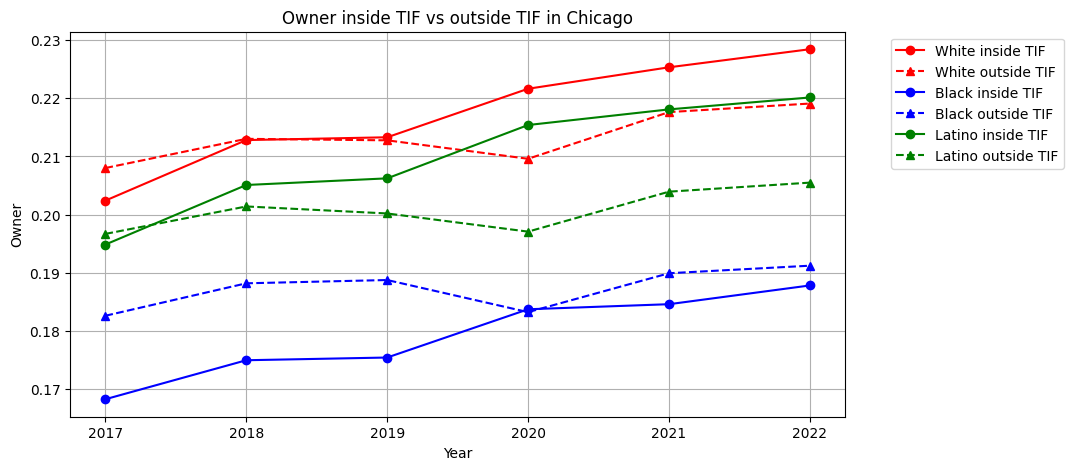

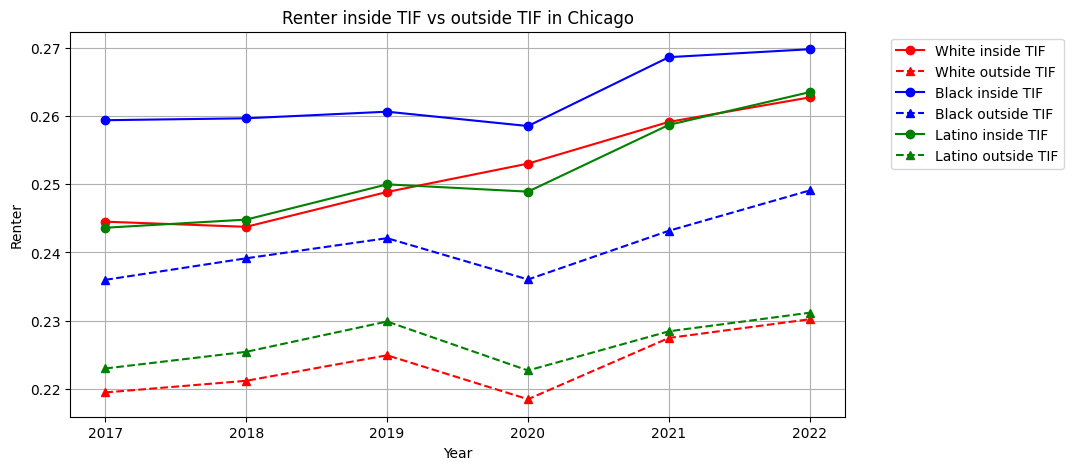

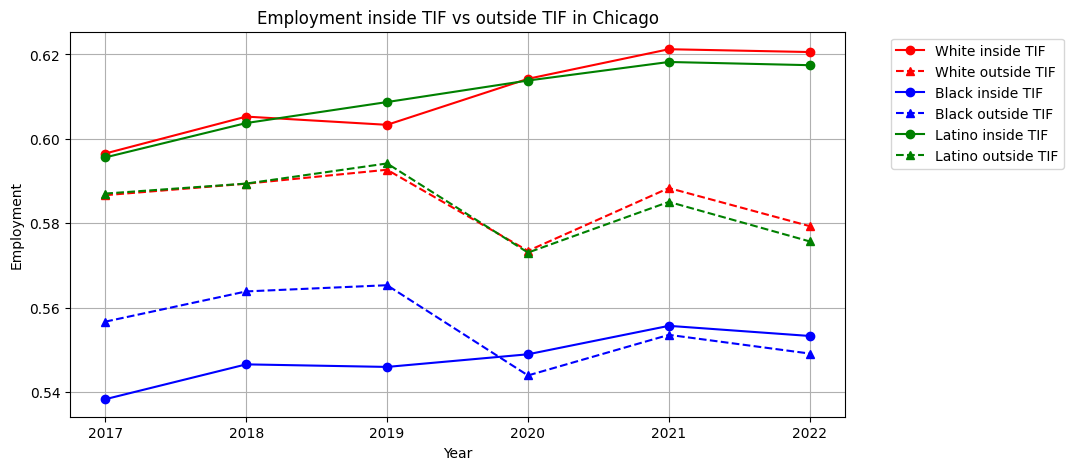

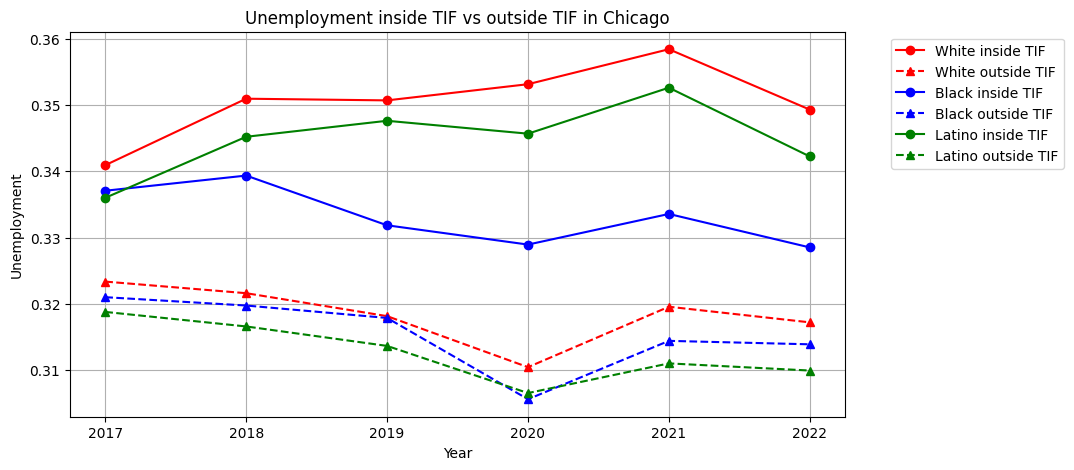

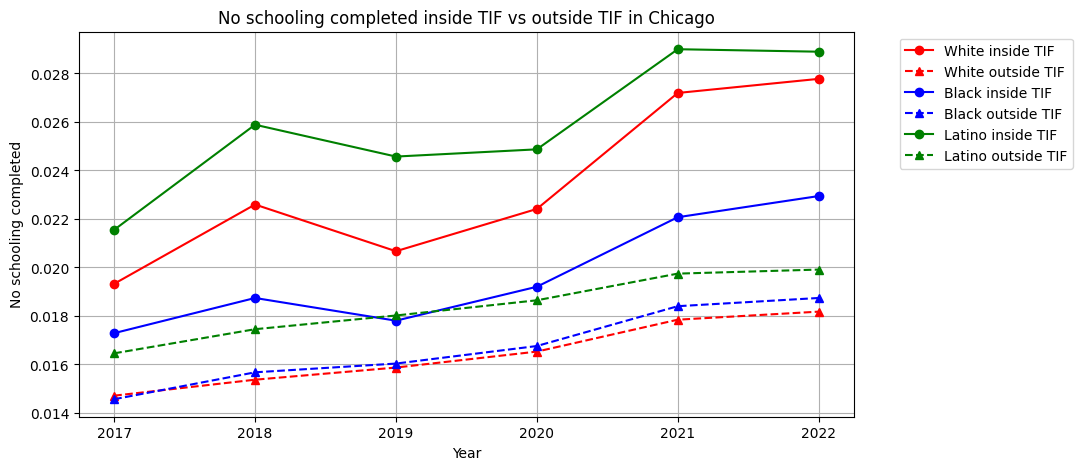

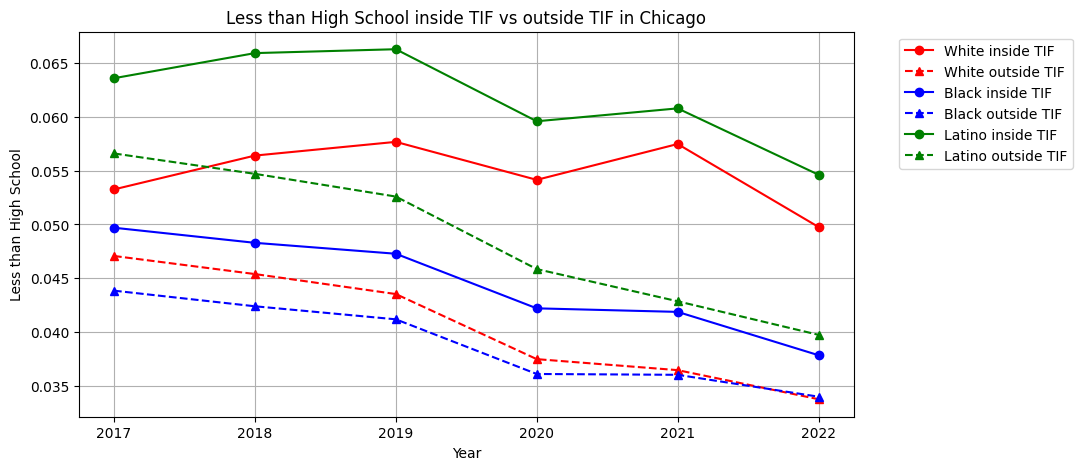

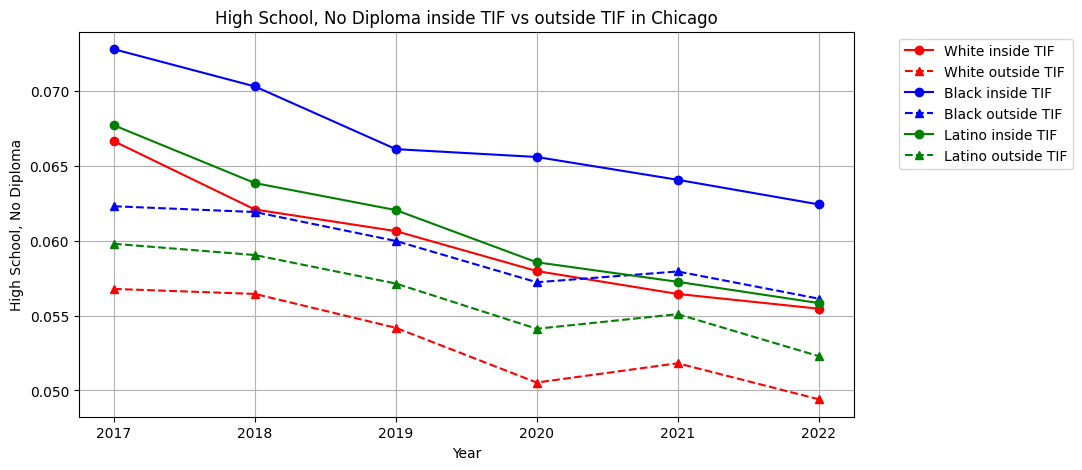

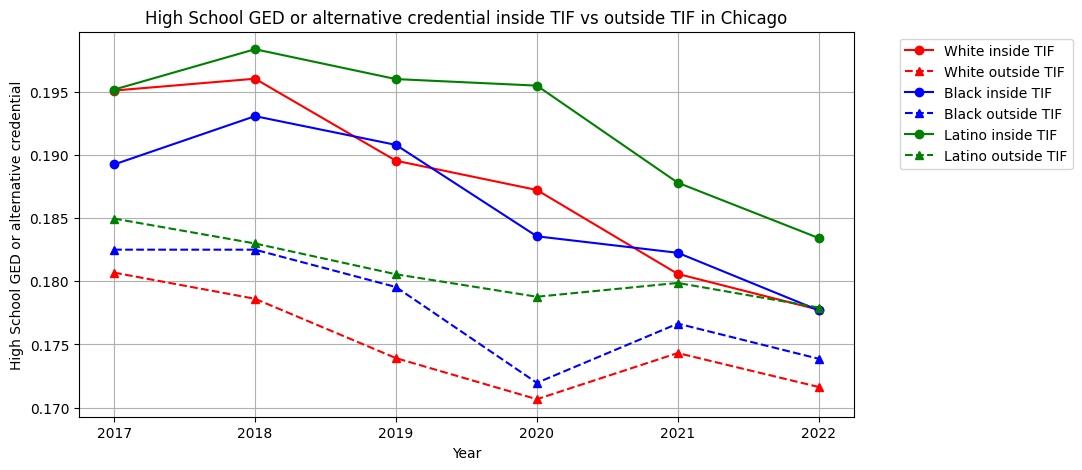

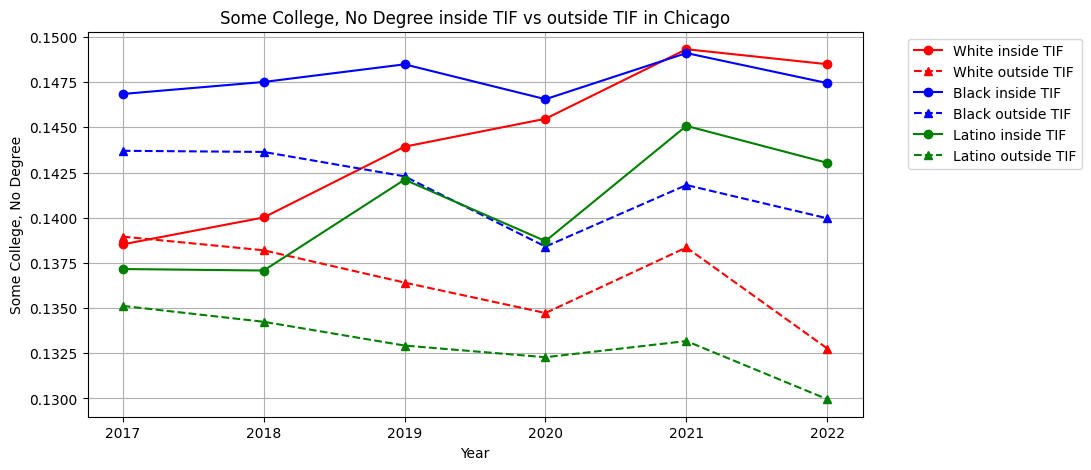

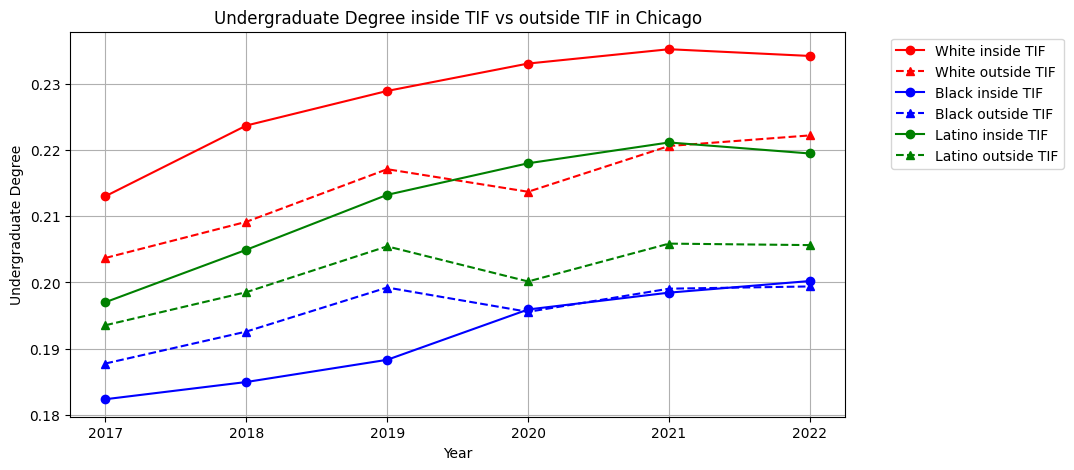

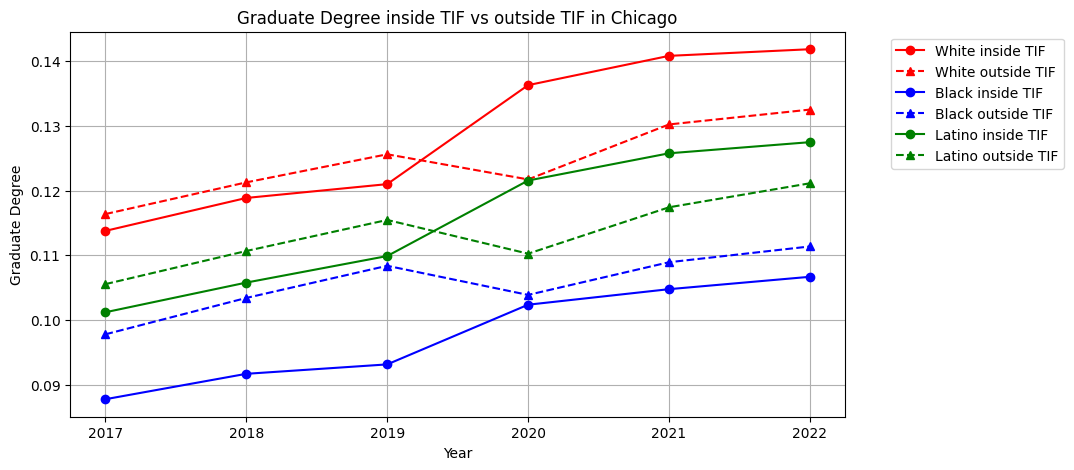

In [ ]:
plot_Chicago(normalized_Owner_TIF,normalized_Owner_Non_TIF)
plot_Chicago(normalized_Renter_TIF,normalized_Renter_Non_TIF)
plot_Chicago(normalized_Employment_TIF,normalized_Employment_Non_TIF)
plot_Chicago(normalized_Unemployment_TIF,normalized_Unemployment_Non_TIF)
plot_Chicago(normalized_EducationA_TIF,normalized_EducationA_Non_TIF)
plot_Chicago(normalized_EducationB_TIF,normalized_EducationB_Non_TIF)
plot_Chicago(normalized_EducationC_TIF,normalized_EducationC_Non_TIF)
plot_Chicago(normalized_EducationD_TIF,normalized_EducationD_Non_TIF)
plot_Chicago(normalized_EducationE_TIF,normalized_EducationE_Non_TIF)
plot_Chicago(normalized_EducationF_TIF,normalized_EducationF_Non_TIF)
plot_Chicago(normalized_EducationG_TIF,normalized_EducationG_Non_TIF)